## ***Natural Languagem Processing*** to predict if a headline from a news website contains sarcasm.

In [101]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, re

In [122]:
sarcasm_df = pd.read_csv('sarcasm.csv')

sarcasm_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


* In order to check whether the website **hostname** can be used as a **predictive** variable, the website host name is extracted and the proportion of **sarcastic** headlines for each *alias* is observed.

In [123]:
pattern = r"^https://([^/]+)/"

sarcasm_df['article_host'] = sarcasm_df['article_link'].apply(lambda row: re.search(pattern, row)[1]).drop(columns=['article_link'])

sarcasm_df = sarcasm_df[['article_host', 'headline', 'is_sarcastic']]

sarcasm_df.tail(n=10)

,article_host,headline,is_sarcastic
26699,www.huffingtonpost.com,"what you should buy your 'basic' friend, accor...",0
26700,www.huffingtonpost.com,what's in your mailbox? tips on what to do whe...,0
26701,www.huffingtonpost.com,paul ryan is more of a con man than ever,0
26702,politics.theonion.com,pentagon to withhold budget figures out of res...,1
26703,www.theonion.com,pope francis wearing sweater vestments he got ...,1
26704,www.huffingtonpost.com,american politics in moral free-fall,0
26705,www.huffingtonpost.com,america's best 20 hikes,0
26706,www.huffingtonpost.com,reparations and obama,0
26707,www.huffingtonpost.com,israeli ban targeting boycott supporters raise...,0
26708,www.huffingtonpost.com,gourmet gifts for the foodie 2014,0


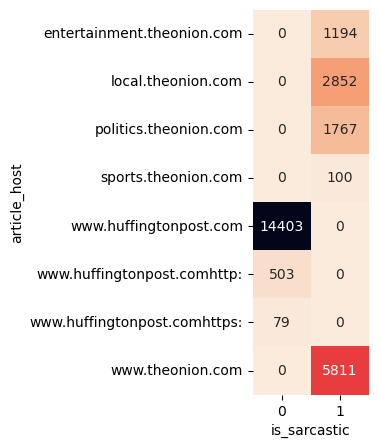

In [125]:
pivot = sarcasm_df.pivot_table(columns='is_sarcastic', index='article_host', aggfunc='size', fill_value=0)

fig = plt.figure(figsize=(1.5, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='rocket_r', cbar=False)

plt.show()

* From the sarcastic headlines proportions, it is clear to see that a especific website hostname is related to a unique class of **is_sarcastic** target variable, therefore it **cannot be used as a predictive variable** on this *natural language processing* task in order to extract from a non-deterministic variables a model to understand a headlines's pattern from the websites.